In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [69]:
DDF = []

for i in range(3,21):
    filename = f'1DROP/benchmark_{i}c_1drop.csv'
    df = pd.read_csv(filename)
    DDF.append(df)

In [71]:
TIMES = []

for i, df in enumerate(DDF):
    
    print(i+3, 'clients:')
    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    TIMES.append(TOTAL)
    
    print('-------------------------')

3 clients:
Communication:  2.068349468708038
Computation:    0.0594944953918457
TOTAL:          2.127843964099884
-------------------------
4 clients:
Communication:  2.1004005074501038
Computation:    0.0890613317489624
TOTAL:          2.1894618391990663
-------------------------
5 clients:
Communication:  2.1331531286239622
Computation:    0.11965646743774415
TOTAL:          2.2528095960617063
-------------------------
6 clients:
Communication:  2.1675285220146177
Computation:    0.1506371259689331
TOTAL:          2.318165647983551
-------------------------
7 clients:
Communication:  2.1988831758499146
Computation:    0.1819867491722107
TOTAL:          2.3808699250221252
-------------------------
8 clients:
Communication:  2.249234700202942
Computation:    0.21319514513015747
TOTAL:          2.4624298453330993
-------------------------
9 clients:
Communication:  2.3340596914291383
Computation:    0.2475517988204956
TOTAL:          2.581611490249634
-------------------------
10 client

In [74]:
TIMES_NODROP = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796, 0.8991318623224894, 1.30727596282959, 1.129831826686859, 1.2296751618385315, 1.311664879322052, 1.4210659265518188, 1.8476926922798158, 2.048360300064087, 2.221667492389679, 2.4300354599952696]
TIMES_1DROP = [2.127843964099884, 2.1894618391990663, 2.2528095960617063, 2.318165647983551, 2.3808699250221252, 2.4624298453330993, 2.581611490249634, 2.6571616172790526, 2.735263657569885, 2.8240065693855283, 2.9129442214965815, 2.990540826320648, 3.075046038627624, 3.1571557998657225, 3.417460286617279, 3.5475353837013244, 3.6774542689323426, 3.8133841872215273]

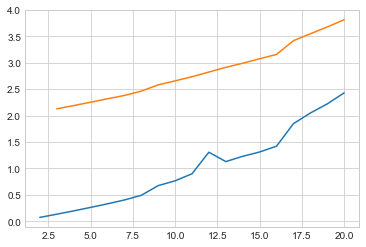

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,21))

ax.plot(x, TIMES_NODROP)
ax.plot(x[1:], TIMES_1DROP)